In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import sklearn as sk
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
df.shape

(213, 11)

In [5]:
df.isnull().sum()


1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [6]:
duplicated = len(df[df.duplicated()])
print(f'There ara {duplicated} duplicated rows')

There ara 0 duplicated rows


In [7]:
df.drop_duplicates()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


<Axes: xlabel='1.1'>

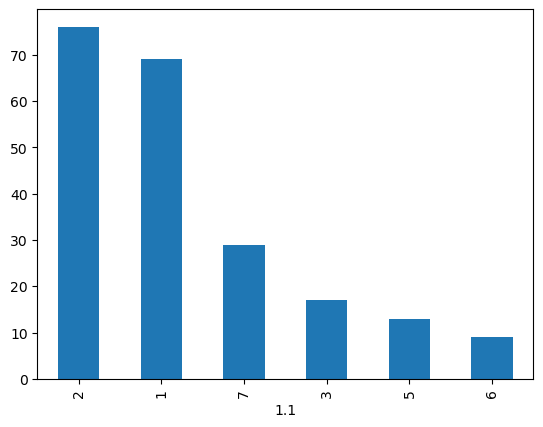

In [9]:
df['1.1'].value_counts().plot(kind='bar')

In [10]:
df['1.1'].value_counts()

1.1
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [11]:
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
from scipy import stats

z = abs(stats.zscore(df))

df = df[(z < 3).all(axis=1)]

df.shape

(193, 11)

In [15]:
features = ['1','1.52101','13.64','4.49','1.10','71.78','0.06','8.75','0.00','0.00.1']
label = ['1.1']

X = df[features]

y = df[label]

In [16]:
X.shape

(193, 10)

In [17]:
type(X)

pandas.core.frame.DataFrame

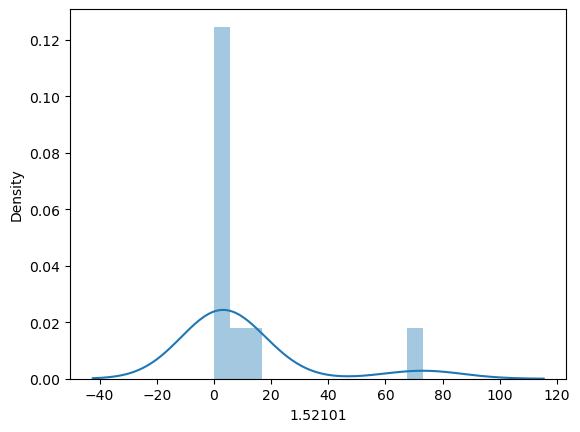

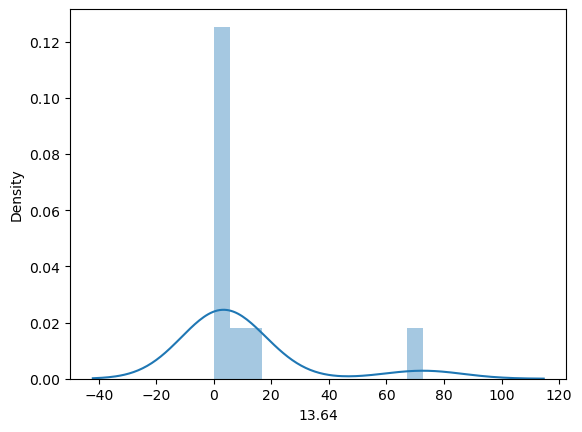

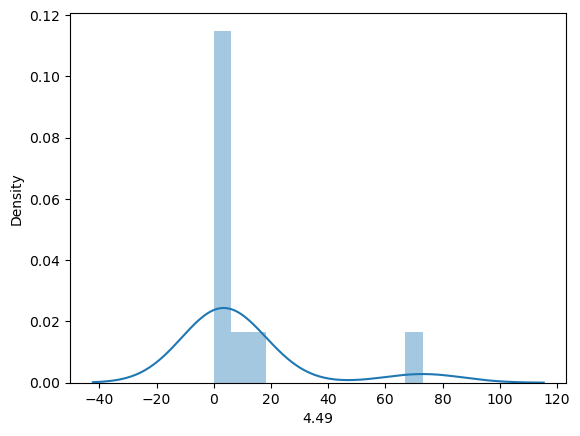

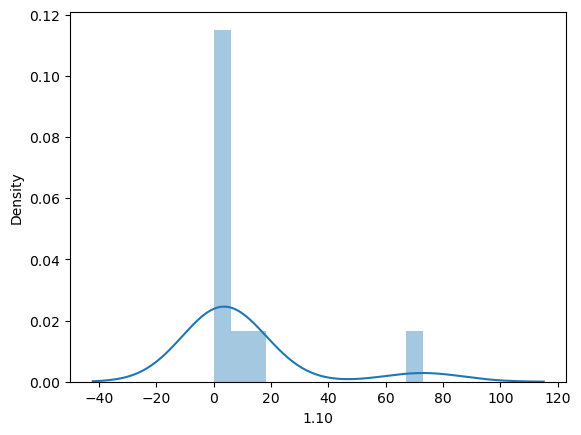

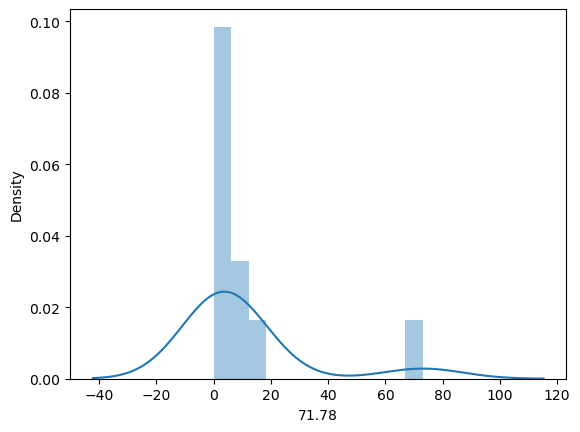

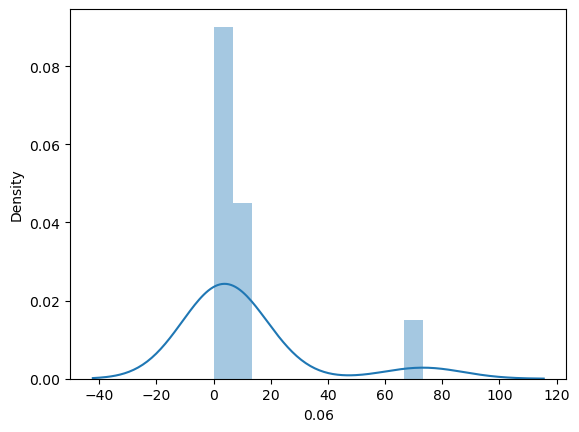

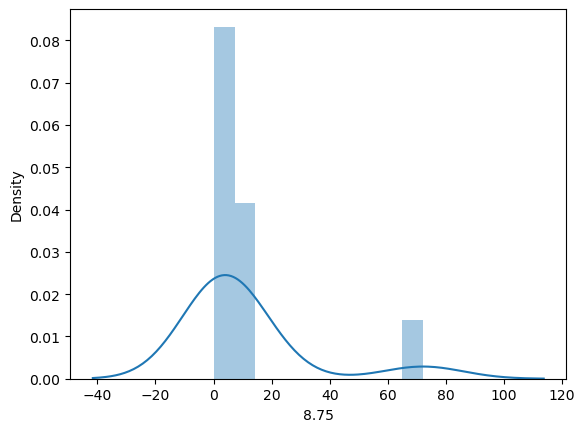

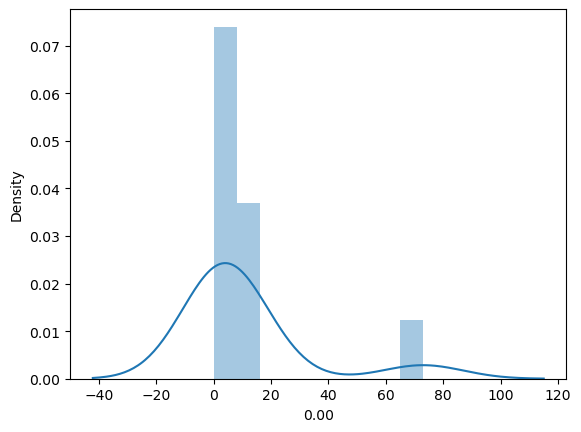

In [18]:
x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

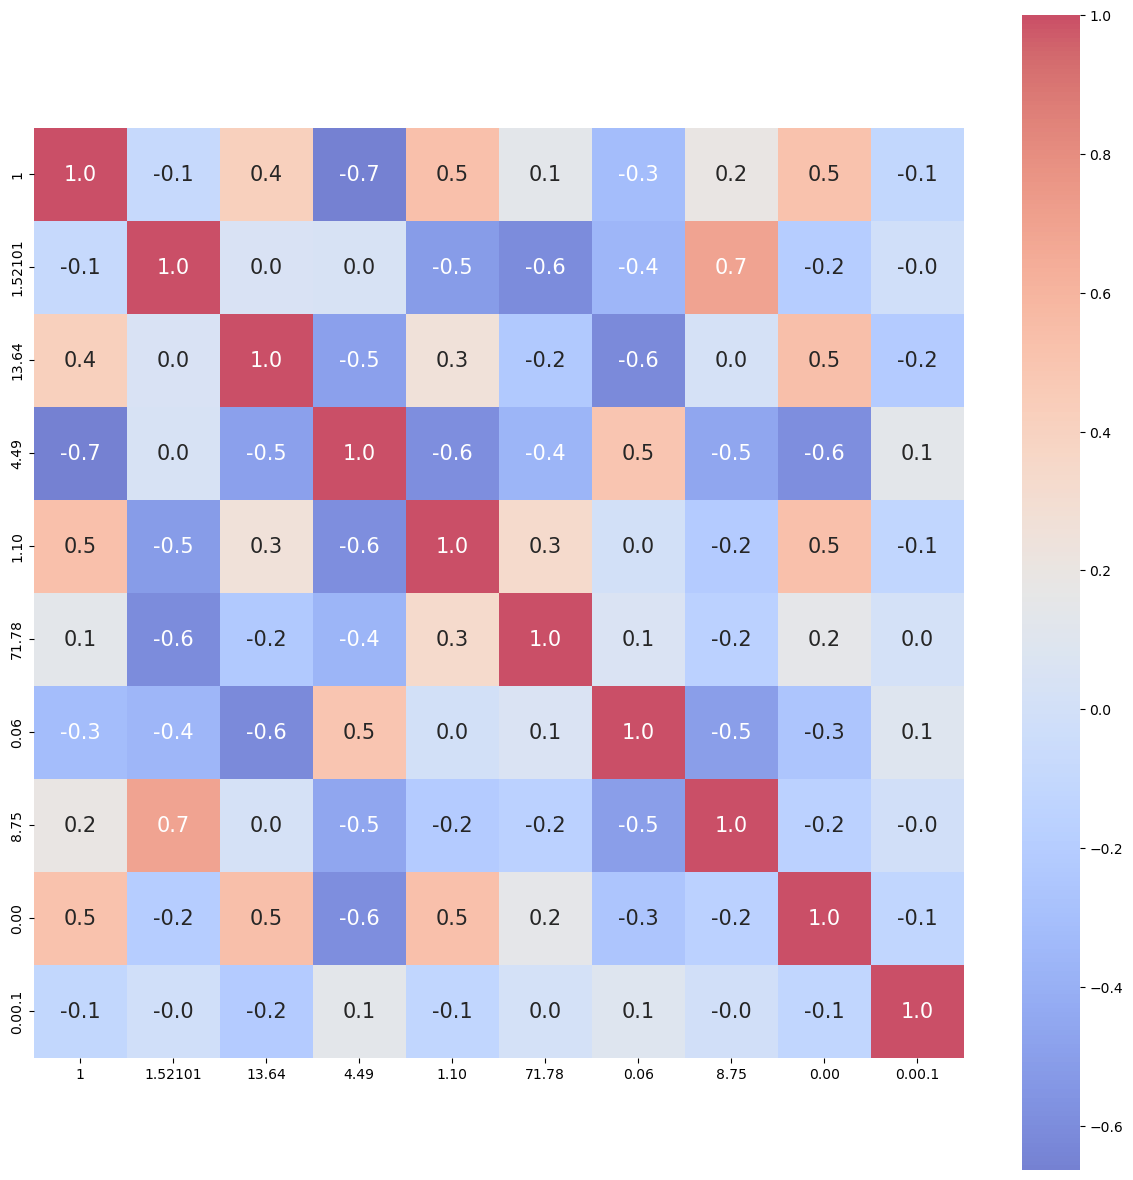

In [19]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [21]:
X.head(2)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0


In [22]:
y.head(2)

,1.1
0,1
1,1


In [23]:
from sklearn import preprocessing
X=preprocessing.scale(X)

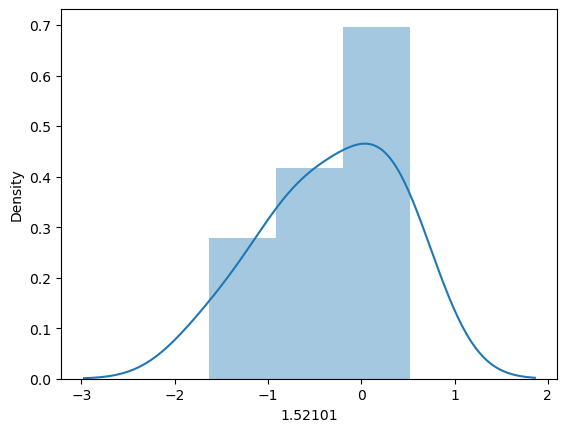

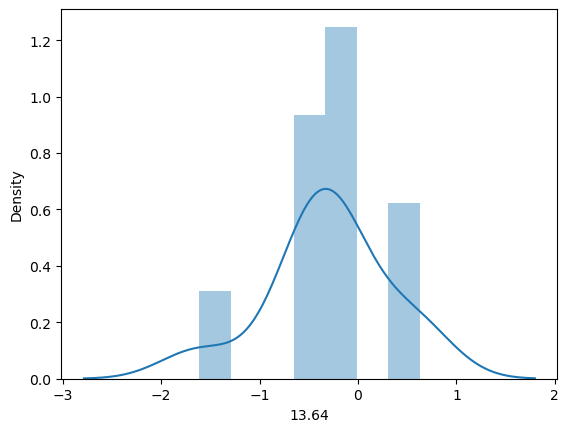

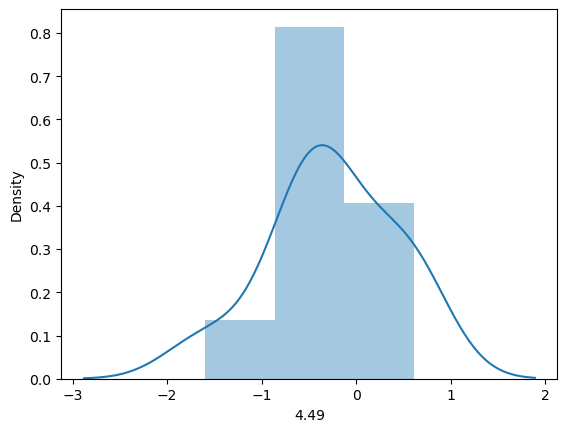

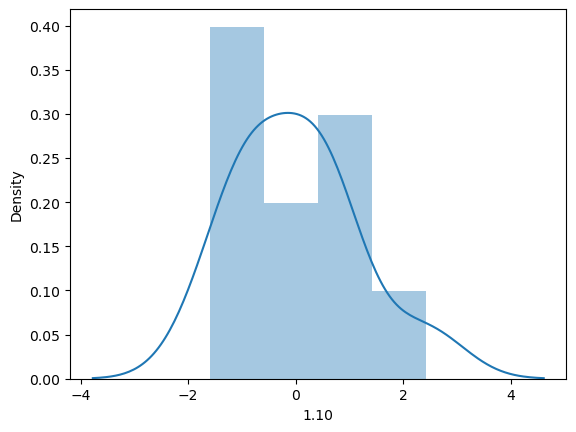

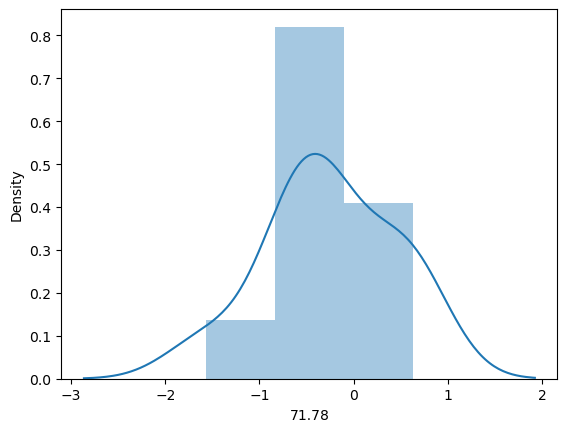

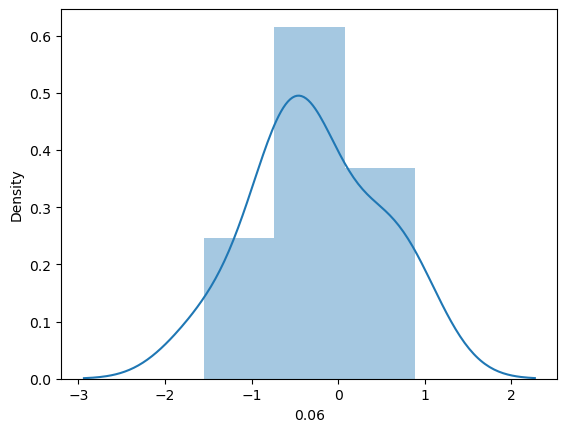

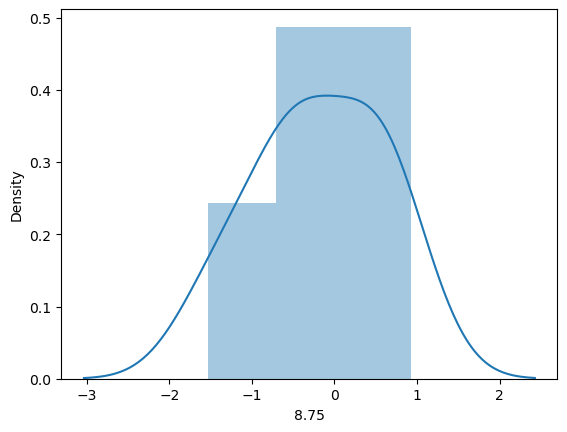

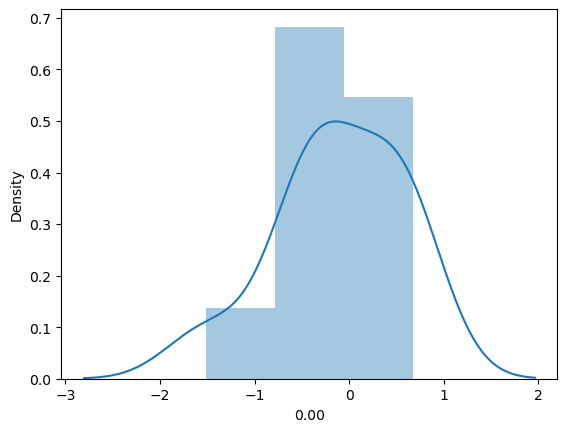

In [24]:
x2 = X

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (144, 10)
Shape of X_test = (49, 10)
Shape of y_train = (144,)
Shape of y_test = (49,)


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.8263888888888888
[0.8775510204081632, 0.8775510204081632, 0.8979591836734694, 0.9183673469387755, 0.8775510204081632, 0.8979591836734694, 0.8979591836734694, 0.8775510204081632, 0.8367346938775511]


In [27]:
from sklearn.linear_model import LogisticRegression

Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)

0.9722222222222222
[0.9591836734693877]


In [28]:

from sklearn.svm import SVC

Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.9236111111111112
[0.8979591836734694]


In [29]:
from sklearn.ensemble import RandomForestClassifier

Scores = []
Range = [10,20,30,50,70,80,100,120]

for i in range(1):
    forest = RandomForestClassifier(criterion='gini', n_estimators=10, min_samples_leaf=1, min_samples_split=4, random_state=1,n_jobs=-1)
    
    forest.fit(X_train, y_train)
    score = forest.score(X_test,y_test)
    

print(forest.score(X_train,y_train))
print(score)

1.0
0.9387755102040817
